Chapter 10

# 使用scikit-learn完成一元线性回归
《线性代数》 | 鸢尾花书：数学不难

这段代码从数学上完整演示了**一元线性回归（Univariate Linear Regression）** 的建模过程，包括参数拟合、预测、误差计算与可视化。它使用的是 Scikit-learn 提供的 `LinearRegression` 工具，自动完成了模型训练与预测步骤，背后的数学原理与最小二乘法完全一致。

---

从数学角度看，我们的目标是：给定一组输入输出数据点 $(x_i, y_i)$，$i = 1, \dots, n$，我们假设它们之间存在线性关系：

$$
\hat{y}_i = b_0 + b_1 x_i
$$

其中 $b_0$ 是截距项，$b_1$ 是斜率。用向量和矩阵记法，可以把所有数据点的预测值写成一个向量形式：

$$
\hat{\boldsymbol{y}} = X \boldsymbol{b}
$$

这里的 $X$ 是 $n \times 2$ 的**设计矩阵**，第一列为全1（对应 $b_0$），第二列为自变量 $x_i$：

$$
X =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$

参数向量 $\boldsymbol{b}$ 包括截距和斜率：

$$
\boldsymbol{b} =
\begin{bmatrix}
b_0 \\
b_1
\end{bmatrix}
$$

---

通过最小化预测值与真实值之间的残差平方和，即损失函数：

$$
J(\boldsymbol{b}) = \|\boldsymbol{y} - X \boldsymbol{b}\|_2^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

我们可以推导出一个封闭形式的最优解：

$$
\boldsymbol{b} = (X^\top X)^{-1} X^\top \boldsymbol{y}
$$

在这段代码中，这一过程被 `model.fit(x, y)` 内部自动完成。此时 `x` 只有一列，所以 scikit-learn 会自动添加常数项并计算出参数 $b_0$ 与 $b_1$，它们分别可以通过 `model.intercept_` 和 `model.coef_` 得到。

---

完成拟合后，我们使用模型在原始训练数据上进行预测：

$$
\hat{\boldsymbol{y}} = X \boldsymbol{b}
$$

这在代码中通过 `model.predict(x)` 得到预测向量 `y_pred`。

接着，代码生成了新的输入值 $x \in [0, 10]$ 上的预测结果 `y_array_pred`，用来绘制平滑的回归直线：

$$
\hat{y}_{\text{new}} = b_0 + b_1 x_{\text{new}}
$$

---

随后，我们计算预测误差：

$$
\boldsymbol{e} = \boldsymbol{y} - \hat{\boldsymbol{y}}
$$

并进一步计算它的 L2 范数的平方：

$$
\|\boldsymbol{e}\|_2^2 = \boldsymbol{e}^\top \boldsymbol{e}
$$

这表示我们拟合结果的总残差，是衡量模型好坏的重要指标。

---

最后，代码用可视化方式展示了整个回归过程：

- 用蓝色叉点 (`x`) 显示原始观测点 $(x_i, y_i)$；
- 用红色叉点 (`x`) 显示预测值 $(x_i, \hat{y}_i)$；
- 用红色线段画出拟合直线 $\hat{y} = b_0 + b_1 x$；
- 用橙色半透明线段连接每个预测值与真实值，表示残差（预测误差）；
- 图形范围固定在 $[0, 10] \times [0, 10]$，并设置了网格与坐标轴标签。

---

整体来看，这段代码完整实现了线性回归建模的每个步骤，并且在图形上明确展现了拟合质量与误差，是最小二乘思想的直观体现。是否需要我进一步对比手工实现与 scikit-learn 自动计算之间的差异？

## 初始化

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 数据

In [6]:
x = np.array([1,2,3,5,6,7,8,9]).reshape(-1,1)   # 自变量 x
y = np.array([3,1,4,6,5,8,7,8]).reshape(-1,1)   # 因变量 y

## 建立线性回归模型

In [8]:
model = LinearRegression()         # 初始化模型
model.fit(x, y)                    # 拟合模型

LinearRegression()

## 获取回归系数和截距

In [10]:
b1 = model.coef_                  # 斜率（形状为 (1, 1)）
b0 = model.intercept_            # 截距（形状为 (1,)）

print("参数向量 b =", np.vstack([b0, b1]))     # 与之前手动求解的 b 对比

参数向量 b = [[1.26751592]
 [0.77707006]]


## 计算预测值（用于训练集）

In [12]:
y_pred = model.predict(x)         # 预测值

## 预测新的 x 区间上的 y 值

In [14]:
x_array = np.linspace(0, 10).reshape(-1,1)
y_array_pred = model.predict(x_array)

## 计算误差向量

In [16]:
error = y - y_pred

## 计算误差向量的 L2 范数的平方

In [18]:
squared_L2_norm = error.T @ error
print("误差平方和 =", squared_L2_norm)

误差平方和 = [[7.94904459]]


## 可视化

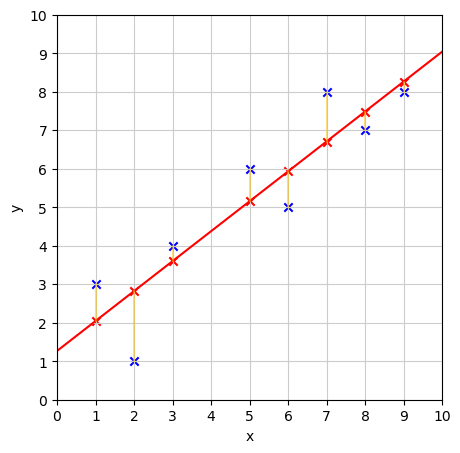

In [20]:
fig, ax = plt.subplots(figsize=(5,5))

# 绘制样本数据
ax.scatter(x, y, marker = 'x', color = 'b')

# 绘制回归直线
ax.plot(x_array, y_array_pred, color='r')

# 绘制预测值
ax.scatter(x, y_pred, marker = 'x', color='r')

# 绘制误差
ax.plot(([i for i in x.squeeze()], [i for i in x.squeeze()]),
        ([j for j in y_pred.squeeze()], [j for j in y.squeeze()]),
         c='#FFC000', alpha = 0.5)

# 装饰
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(11))
ax.grid(True, c = '0.8')
ax.set_aspect('equal', 'box')

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  